In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
%matplotlib inline

### 처리시간을 출력해주는 함수 만들기

In [2]:
def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

### train data 가져오기

In [3]:
train = pd.read_csv('./data/TeamMission/training.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

#### na 값 drop 하기

In [5]:
train.dropna(inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [7]:
train.shape

(2140, 31)

#### Index 번호 다시 부여하기

In [8]:
train.index = pd.RangeIndex(len(train.index))

In [9]:
train.tail(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139,66.683755,34.483429,30.784490,38.578939,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,59.269388,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,52.923371,82.661062,68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...


### test data 가져오기

In [10]:
test = pd.read_csv('./data/TeamMission/test.csv')

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [12]:
test.shape

(1783, 2)

### Image 배열화 하기

In [13]:
len(train), len(test)

(2140, 1783)

In [14]:
train.Image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [15]:
test.Image[0]

'182 183 182 182 180 180 176 169 156 137 124 103 79 62 54 56 58 48 49 45 39 37 42 43 52 61 78 93 104 107 114 115 117 122 120 122 118 114 115 118 117 123 122 122 112 113 118 125 124 122 109 101 96 102 108 107 100 89 76 67 58 48 44 36 32 21 12 5 15 21 24 33 32 41 52 63 71 90 106 121 152 173 180 183 182 182 183 182 182 181 182 182 183 182 182 182 182 181 181 181 182 179 177 162 136 106 84 64 49 44 40 50 50 42 36 33 32 43 51 67 77 94 106 121 124 128 127 126 128 128 129 126 126 122 128 123 128 123 129 127 133 123 128 129 135 127 122 111 115 118 120 121 118 114 107 107 99 89 74 70 59 47 29 18 16 22 25 25 34 39 45 51 52 60 84 97 124 157 175 181 183 182 183 182 184 181 183 183 183 182 182 182 182 181 180 183 182 180 176 152 111 77 59 45 36 40 51 48 37 29 29 33 45 61 81 95 107 113 120 126 129 128 132 132 130 132 132 132 131 133 130 132 129 130 133 137 136 137 135 137 137 134 129 125 126 131 131 128 128 124 124 122 121 111 105 98 86 72 62 42 27 20 19 14 15 27 40 36 27 41 56 77 107 138 163 176 18

In [16]:
len(train.Image[0].split(' ')), len(test.Image[0].split(' '))

(9216, 9216)

In [17]:
train.Image[0].split(' ')[0], test.Image[0].split(' ')[0]

('238', '182')

In [18]:
for x in range(len(train)):
    train.Image[x] = np.asarray(train.Image[x].split(' '), dtype=np.uint8).reshape(96, 96)

C:\python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
for x in range(len(test)):
    test.Image[x] = np.asarray(test.Image[x].split(' '), dtype=np.uint8).reshape(96, 96)

C:\python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
train.shape, test.shape

((2140, 31), (1783, 2))

In [21]:
train.Image[0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]], dtype=uint8)

In [22]:
test.Image[0]

array([[182, 183, 182, ..., 182, 182, 182],
       [182, 181, 181, ..., 182, 182, 182],
       [182, 181, 180, ..., 182, 181, 182],
       ...,
       [ 42,  36,  20, ..., 126, 136, 153],
       [ 31,   8,   0, ...,   9,  11,  33],
       [  3,   0,   1, ...,   8,   5,   5]], dtype=uint8)

### y값 만들기

In [23]:
y = train.iloc[:, :-1].values

In [24]:
y.shape

(2140, 30)

In [25]:
y[1,:]

array([64.33293617, 34.9700766 , 29.9492766 , 33.44871489, 58.85617021,
       35.27434894, 70.7227234 , 36.18716596, 36.0347234 , 34.36153191,
       24.47251064, 33.14444255, 53.98740426, 28.27594894, 78.63421277,
       30.4059234 , 42.72885106, 26.14604255, 16.8653617 , 27.05885957,
       48.20629787, 55.66093617, 56.42144681, 76.352     , 35.12238298,
       76.04765957, 46.68459574, 70.26655319, 45.46791489, 85.48017021])

### Key_points 찍어보는 함수 만들기

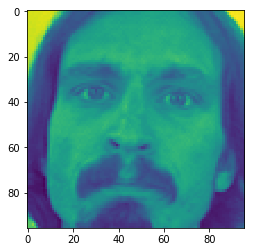

In [26]:
plt.imshow(train.Image[0])
plt.show()

In [27]:
def keypoints_show(x, y=None):
    plt.imshow(x, 'gray')
    if y is not None:
        points = np.vstack(np.split(y, 15)).T
        plt.plot(points[0], points[1], 'o', color='red')
    plt.axis('off')   

In [28]:
sample_idx = np.random.choice(len(train))

In [29]:
y[sample_idx]

array([65.61066667, 32.66395897, 30.0414359 , 33.03064615, 60.10994872,
       33.76402051, 71.47733333, 33.76402051, 36.27487179, 33.39733333,
       24.90748718, 34.49764103, 59.00964103, 21.66317949, 78.74625641,
       25.67876923, 39.57497436, 24.96344615, 18.18994872, 27.99105641,
       49.47610256, 48.06482051, 62.30974359, 70.06687179, 36.64164103,
       68.23302564, 48.7425641 , 63.46584615, 49.10933333, 78.86769231])

In [30]:
train.Image[sample_idx]

array([[199, 196, 196, ..., 254, 254, 254],
       [195, 197, 189, ..., 254, 254, 254],
       [199, 188, 163, ..., 254, 254, 254],
       ...,
       [216, 213, 215, ...,  69,  76, 153],
       [215, 213, 215, ...,  40,  26,  71],
       [213, 211, 212, ...,  15,   6,   3]], dtype=uint8)

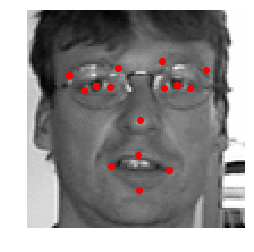

In [31]:
keypoints_show(train.Image[sample_idx], y[sample_idx])

### train / test data shape 변경

In [32]:
x = np.stack(train.Image)[..., None]

In [33]:
x.shape

(2140, 96, 96, 1)

In [34]:
x_t = np.stack(test.Image)[..., None]

In [35]:
x_t.shape

(1783, 96, 96, 1)

### Data scaling

In [36]:
x = x / 255.0

In [37]:
x

array([[[[0.93333333],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333333],
         [0.9254902 ],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98431373]],

        [[0.92941176],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98039216]],

        ...,

        [[0.72941176],
         [0.71764706],
         [0.70980392],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.74117647],
         [0.7372549 ],
         [0.81176471],
         ...,
         [0.23921569],
         [0.27058824],
         [0.30588235]],

        [[0.74901961],
         [0.72156863],
         [0.72156863],
         ...,
         [0.2745098 ],
         [0.29411765],
         [0.35294118]]],


       [[[0.85882353],
         [0.84313725],
         [0.8 

In [38]:
x_t = x_t / 255.0

In [39]:
x_t

array([[[[0.71372549],
         [0.71764706],
         [0.71372549],
         ...,
         [0.71372549],
         [0.71372549],
         [0.71372549]],

        [[0.71372549],
         [0.70980392],
         [0.70980392],
         ...,
         [0.71372549],
         [0.71372549],
         [0.71372549]],

        [[0.71372549],
         [0.70980392],
         [0.70588235],
         ...,
         [0.71372549],
         [0.70980392],
         [0.71372549]],

        ...,

        [[0.16470588],
         [0.14117647],
         [0.07843137],
         ...,
         [0.49411765],
         [0.53333333],
         [0.6       ]],

        [[0.12156863],
         [0.03137255],
         [0.        ],
         ...,
         [0.03529412],
         [0.04313725],
         [0.12941176]],

        [[0.01176471],
         [0.        ],
         [0.00392157],
         ...,
         [0.03137255],
         [0.01960784],
         [0.01960784]]],


       [[[0.29803922],
         [0.34117647],
         [0.31

### Model

In [40]:
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten, LeakyReLU, ELU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import model_to_dot

C:\python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### create model 1 (CNN)

In [41]:
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'linear', input_shape = (96, 96, 1)))
# model.add(LeakyReLU(alpha=.001))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.7))
# model.add(Flatten())
# model.add(Dense(256, activation = 'linear'))
# model.add(LeakyReLU(alpha=.001))
# model.add(Dropout(0.7))
# model.add(Dense(128, activation = 'linear'))
# model.add(LeakyReLU(alpha=.001))
# model.add(Dropout(0.7))
# model.add(Dense(30))

#### create model 2 (CNN)

In [42]:
# model2 = Sequential()

# model2.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'Same', activation = 'linear', input_shape = (96, 96, 1)))
# model2.add(LeakyReLU(alpha=.001))
# model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model2.add(Dropout(0.5))
# model2.add(Flatten())
# model2.add(Dense(256, activation = 'linear'))
# model2.add(LeakyReLU(alpha=.001))
# model2.add(Dropout(0.7))
# model2.add(Dense(30))

#### create model 3 (CNN)

In [43]:
# model3 = Sequential()

# model3.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'Same', activation = 'linear', input_shape = (96, 96, 1)))
# model3.add(LeakyReLU(alpha=.001))
# model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model3.add(Dropout(0.5))
# model3.add(Flatten())
# model3.add(Dense(256, activation = 'linear'))
# model3.add(LeakyReLU(alpha=.001))
# model3.add(Dropout(0.5))
# model3.add(Dense(128, activation = 'linear'))
# model3.add(LeakyReLU(alpha=.001))
# model3.add(Dropout(0.7))
# model3.add(Dense(30))

#### create model 4 (CNN) - ELU

In [44]:
# np.random.seed(777)

# model4 = Sequential()

# model4.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'elu', input_shape = (96, 96, 1)))
# model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model4.add(Dropout(0.3))

# model4.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'elu'))
# model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model4.add(Dropout(0.5))

# model4.add(Flatten())
# model4.add(Dense(128, activation = 'relu'))
# model4.add(Dropout(0.5))
# model4.add(Dense(30, activation = 'linear'))

#### create model 5 (CNN) - relu

In [45]:
# np.random.seed(777)

# model5 = Sequential()

# model5.add(Conv2D(filters = 32, kernel_size = (4,4), padding = 'Same', activation = 'relu', input_shape = (96, 96, 1)))
# model5.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'Same', activation = 'relu'))
# model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model5.add(Dropout(0.25))
# model5.add(Flatten())
# model5.add(Dense(256, activation = 'relu'))
# model5.add(Dropout(0.5))
# model5.add(Dense(128, activation = 'relu'))
# model5.add(Dropout(0.7))
# model5.add(Dense(30))

#### create model 6 (CNN) - elu + relu

In [46]:
# np.random.seed(777)

# model6 = Sequential()

# model6.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'elu', input_shape = (96, 96, 1)))
# model6.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model6.add(Dropout(0.3))

# model6.add(Conv2D(filters = 32, kernel_size = (4,4), padding = 'Same', activation = 'elu'))
# model6.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model6.add(Dropout(0.5))

# model6.add(Flatten())
# model6.add(Dense(256, activation = 'elu'))
# model6.add(Dropout(0.5))
# model6.add(Dense(128, activation = 'relu'))
# model6.add(Dropout(0.7))
# model6.add(Dense(30))

#### create model 7 (CNN)

In [47]:
# np.random.seed(777)

# model7 = Sequential()

# model7.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (96, 96, 1)))
# model7.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model7.add(Dropout(0.5))

# model7.add(Conv2D(filters = 32, kernel_size = (4,4), padding = 'Same', activation = 'relu'))
# model7.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model7.add(Dropout(0.5))
# model7.add(Flatten())

# model7.add(Dense(128, activation = 'relu'))
# model7.add(Dropout(0.7))
# model7.add(Dense(30))

#### create model 8 (CNN) - LAST

In [48]:
np.random.seed(777)

model8 = Sequential()

model8.add(Conv2D(filters = 64, kernel_size = (6,6), padding = 'Same', activation = 'relu', input_shape = (96, 96, 1)))
model8.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model8.add(Dropout(0.3))

model8.add(Conv2D(filters = 32, kernel_size = (4,4), padding = 'Same', activation = 'relu'))
model8.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model8.add(Dropout(0.5))
model8.add(Flatten())

model8.add(Dense(256, activation = 'relu'))
model8.add(Dropout(0.5))
model8.add(Dense(128, activation = 'relu'))
model8.add(Dense(30))

#### Compile the model 1

In [49]:
# model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'accuracy'])

#### Compile the model 2

In [50]:
# model2.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'accuracy'])

#### Compile the model 3

In [51]:
# model3.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'accuracy'])

#### Compile the model 4

In [52]:
# model4.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'accuracy'])

#### Compile the model 5

In [53]:
# model5.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

#### Compile the model 6

In [54]:
# model6.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

#### Compile the model 7

In [55]:
# model7.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

#### Compile the model 8

In [56]:
model8.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

### 모델 최적화 설정

In [57]:
MODEL_DIR = './model/'

In [58]:
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [59]:
modelpath = './model/{epoch:02d}-{val_loss:4f}.hdf5'

In [60]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [61]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### go!

In [62]:
# time1 = time.time()
# model.fit(x, y, epochs=100, batch_size=128, validation_split=0.2)
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [63]:
# time1 = time.time()
# model2.fit(x, y, epochs=100, batch_size=100, validation_split=0.3)
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [64]:
# time1 = time.time()
# model3.fit(x, y, epochs=100, batch_size=100, validation_split=0.2)
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [65]:
# time1 = time.time()
# model4.fit(x, y, epochs=100, batch_size=100, validation_split=0.25)
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [66]:
# time1 = time.time()
# history = model5.fit(x, y, validation_split=0.3, epochs=100, batch_size=100, verbose=1, callbacks=[early_stopping_callback, checkpointer])
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [67]:
# time1 = time.time()
# history = model6.fit(x, y, validation_split=0.3, epochs=100, batch_size=100, verbose=1, callbacks=[early_stopping_callback, checkpointer])
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [68]:
# time1 = time.time()
# history = model7.fit(x, y, validation_split=0.3, epochs=100, batch_size=100, verbose=1, callbacks=[early_stopping_callback, checkpointer])
# time2 = time.time()
# print('Learning Finished!')
# chk_processting_time(time1, time2)

In [ ]:
time1 = time.time()
history = model8.fit(x, y, validation_split=0.3, epochs=100, batch_size=100, verbose=1, callbacks=[early_stopping_callback, checkpointer])
time2 = time.time()
print('Learning Finished!')
chk_processting_time(time1, time2)

Train on 1498 samples, validate on 642 samples
Epoch 1/100
1498/1498 [==============================] - 95s 63ms/step - loss: 1176.1863 - acc: 0.0494 - val_loss: 321.0490 - val_acc: 0.4564

Epoch 00001: val_loss improved from inf to 321.04900, saving model to ./model/01-321.048995.hdf5
Epoch 2/100
1498/1498 [==============================] - 95s 63ms/step - loss: 291.7492 - acc: 0.3344 - val_loss: 302.2088 - val_acc: 0.4019

Epoch 00002: val_loss improved from 321.04900 to 302.20879, saving model to ./model/02-302.208786.hdf5
Epoch 3/100
1498/1498 [==============================] - 92s 61ms/step - loss: 168.1086 - acc: 0.3011 - val_loss: 394.2111 - val_acc: 0.4564

Epoch 00003: val_loss did not improve from 302.20879
Epoch 4/100
1498/1498 [==============================] - 92s 62ms/step - loss: 105.6395 - acc: 0.3925 - val_loss: 158.4409 - val_acc: 0.4564

Epoch 00004: val_loss improved from 302.20879 to 158.44095, saving model to ./model/04-158.440946.hdf5
Epoch 5/100
1498/1498 [=====

### 모델에 예측값 넣기

In [52]:
predict = model8.predict(x)

### loss 값 그래프로 출력 (train / validation)

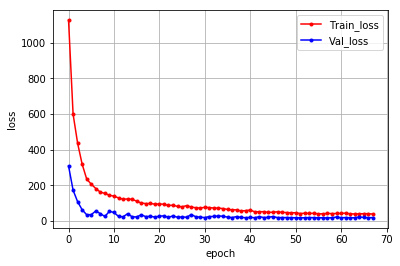

In [53]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(train_loss))
plt.plot(x_len, train_loss, marker='.', c='red', label='Train_loss')
plt.plot(x_len, val_loss, marker='.', c='blue', label='Val_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 예측값 / 실제값 비교

In [54]:
def result_show(x, y, predict):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    for ax in axes:
        ax.imshow(x, 'gray')
        ax.axis('off')
        
    points = np.vstack(np.split(y, 15)).T
    p_points = np.vstack(np.split(predict, 15)).T
    
    axes[0].plot(p_points[0], p_points[1], 'o', color='red')
    axes[0].set_title('Predict_Keypoints', size=15)
    
    axes[1].plot(p_points[0], p_points[1], 'o', color='red')
    axes[1].plot(points[0], points[1], 'o', color='blue')
    axes[1].set_title('Result', size=15)

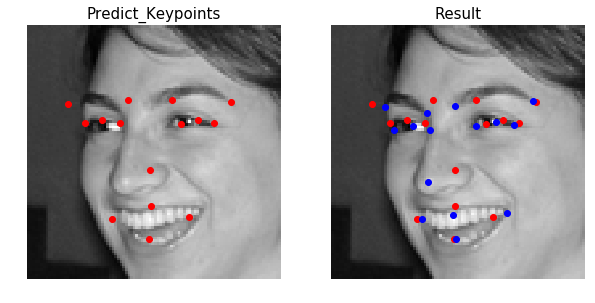

In [58]:
sample_idx = np.random.choice(len(train))
result_show(train.Image[sample_idx], y[sample_idx], predict[sample_idx])

### Test data 예측하기

In [59]:
x_t.shape

(1783, 96, 96, 1)

In [62]:
y_t = model2.predict(x_t)

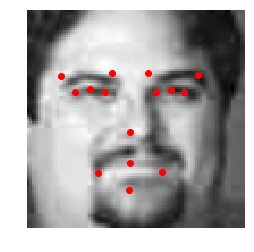

In [66]:
sample_idx = np.random.choice(len(test))
keypoints_show(test.Image[sample_idx], y_t[sample_idx])

### 데이터 제출

In [67]:
look_id = pd.read_csv('./data/TeamMission/IdLookupTable.csv')

In [68]:
look_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.7+ KB


In [69]:
look_id.drop('Location', axis=1, inplace=True)

In [70]:
look_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 3 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
dtypes: int64(2), object(1)
memory usage: 635.8+ KB


In [71]:
ind = np.array(train.columns[:-1])
value = np.array(range(0,30))
maps = pd.Series(value, ind)

In [72]:
look_id['location_id'] = look_id.FeatureName.map(maps)

In [73]:
df = look_id.copy()

location = pd.DataFrame({'Location':[]})
for i in range(1,1784):
    ind = df[df.ImageId==i].location_id
    location = location.append(pd.DataFrame(y_t[i-1][list(ind)],columns=['Location']), ignore_index=True)

In [74]:
look_id['Location']=location

In [75]:
look_id[['RowId','Location']].to_csv('Predict.csv',index=False)

### Kaggle 답 제출

#### Kaggel API 설치

In [77]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle: started
  Running setup.py bdist_wheel for kaggle: finished with status 'done'
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\8b\21\3b\a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify: started
  Running setup.py bdist_wheel for python-slugify: finished with status 'done'
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\e3\65\da\2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [78]:
!pip show kaggle

Name: kaggle
Version: 1.5.0
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\python\anaconda3-52\lib\site-packages
Requires: certifi, urllib3, python-slugify, requests, python-dateutil, tqdm, six
Required-by: 


#### Kaggle API가 설치된 위치를 확인한 후 다운로드 한 kaggle.json 파일을 이동시킨다

In [86]:
!kaggle config path

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')


#### Submission

In [148]:
! kaggle competitions submit -c facial-keypoints-detection -f predict.csv -m'submission

Successfully submitted to Facial Keypoints Detection



  0%|          | 0.00/427k [00:00<?, ?B/s]
  2%|1         | 8.00k/427k [00:00<00:12, 35.3kB/s]
  9%|9         | 40.0k/427k [00:00<00:08, 47.8kB/s]
 22%|##2       | 96.0k/427k [00:00<00:05, 65.6kB/s]
 37%|###7      | 160k/427k [00:00<00:03, 89.2kB/s] 
 56%|#####6    | 240k/427k [00:00<00:01, 121kB/s] 
 79%|#######8  | 336k/427k [00:00<00:00, 162kB/s]
100%|##########| 427k/427k [00:00<00:00, 213kB/s]


In [149]:
!kaggle competitions submissions -c facial-keypoints-detection

fileName      date                 description                 status    publicScore  privateScore  
------------  -------------------  --------------------------  --------  -----------  ------------  
predict.csv   2018-11-28 12:07:47  'submission                 complete  5.20851      5.20052       
predict.csv   2018-11-28 06:58:17  'submission                 complete  4.65624      4.58835       
CNN Studying  2018-11-27 13:35:27  From "CNN Studying" Script  error     None         None          
CNN Studying  2018-11-27 13:19:45  From "CNN Studying" Script  error     None         None          
